In [1]:
#Speed Dating Experiment at Columbia University among graduate student population
#Source: https://www.kaggle.com/annavictoria/speed-dating-experiment
#wanted to see what people look for in a potential mate
#Question: Can we predict a match (both parties say yes to a second date)? 
#categorical data

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dating = pd.read_csv('data/dating.csv', encoding= "ISO-8859-1")

In [3]:
dating
#pre-survey: profile, interests, attributes/preferences you value in a partner
#scorecard during speed dating: attributes of the partner, like, prob the person will say yes to you, dec: if you wanna see him/her again
#after event/follow-up survey and 3-4 weeks after the event survey (but I didn't look into this much because I wanted to predict a match with using only the pre-event and event info)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
dating.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [25]:
dating.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,1,1.0,Female,1,1,1,10,7,4,1,...,7.0,1,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
1,1,1.0,Female,1,1,1,10,7,3,2,...,7.0,1,7.0,8.0,7.0,8.0,5.0,7.0,5.0,1.0
2,1,1.0,Female,1,1,1,10,7,10,3,...,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,NaN,1.0
3,1,1.0,Female,1,1,1,10,7,5,4,...,7.0,1,7.0,6.0,8.0,7.0,6.0,7.0,6.0,2.0
4,1,1.0,Female,1,1,1,10,7,7,5,...,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,2.0


In [6]:
#total number of null values
dating.isnull().sum()
#remove: positin1, shar_o, amb1_3 through to amb5_3 because too many NaN values 

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
            ... 
amb1_3      4404
shar1_3     4404
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
attr4_3     5419
sinc4_3     5419
intel4_3    5419
fun4_3      5419
amb4_3      5419
shar4_3     5419
attr2_3     5419
sinc2_3     5419
intel2_3    5419
fun2_3      5419
amb2_3      5419
shar2_3     6362
attr3_3     4404
sinc3_3     4404
intel3_3    4404
fun3_3      4404
amb3_3      4404
attr5_3     6362
sinc5_3     6362
intel5_3    63

In [7]:
#total number of matches by the end of the night
#match = both parties said YES to second date; subject said yes to "do you want to meet partner again?"  AND partner said yes to "do you want to meet subject again?"
dating['match'].value_counts()
#1380/8378 = 0.1647     
#16.47% was a match

0    6998
1    1380
Name: match, dtype: int64

In [8]:
#data cleaning
#removing duplicates
replacements= {'94115': 'San Francisco', 'california':'California', 'California (West Coast)': 'California', 'I am from NYC': 'New York', 'new york': 'New York', 'nyc': 'New York', 'NYC': 'New York', 'New York City': 'New York','brooklyn, ny': 'Brooklyn, NY', 'brooklyn ny': 'Brooklyn, NY' , 'Manila, Philippines': 'Philippines', 'philippines': 'Philippines', 'Ann Arbor': 'Ann Arbor, MI','P.R. China': 'China', 'spain': 'Spain', 'uruguay':'Uruguay', 'Boston, MA': 'Boston', 'Boston, MA': 'Boston', 'Boston, Ma': 'Boston', 'china': 'China', 'lOS aNGELES': 'Los Angeles', 'india': 'India', 'NJ': 'New Jersey', 'Portland, OR': 'Portland, Oregon','sofia, bg':'Bulgaria','taiwan': 'Taiwan', 'Taipei, Taiwan':'Taiwan', 'MD':'Maryland', 'japan':'Japan'}


dating['from'].replace(replacements, inplace = True)


In [9]:
dating['from'].value_counts()

New York                                                      849
New Jersey                                                    437
California                                                    336
Boston                                                        189
China                                                         144
Taiwan                                                        133
Italy                                                         132
Texas                                                         120
Maryland                                                      116
India                                                         113
Spain                                                         105
Israel                                                        104
Chicago                                                        95
San Francisco                                                  94
Washington, DC                                                 87
France    

In [10]:
dating.drop('positin1', axis=1, inplace=True)
dating.drop('shar_o', axis = 1, inplace = True)

In [11]:
#remove all columns with more than 900+ NaN values
dating.drop(['amb_o','expnum','attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1','shar','match_es','attr1_s','sinc1_s','attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2','attr4_2','intel1_s','fun1_s','amb1_s','shar1_s','attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s','sinc4_2','intel4_2','fun4_2','amb4_2','shar4_2','attr2_2','sinc2_2','intel2_2','fun2_2','amb2_2','shar2_2','attr5_2','sinc5_2','intel5_2','fun5_2','amb5_2','you_call','them_cal', 'date_3','numdat_3','num_in_3','attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3','intel7_3', 'fun7_3', 'amb7_3','shar7_3','attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3','attr2_3','sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3','attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3','attr5_3','sinc5_3','intel5_3','fun5_3','amb5_3','satis_2','length','numdat_2','attr1_2','sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2','attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2'], axis =1, inplace=True)

In [12]:
dating.isnull().sum()

iid           0
id            1
gender        0
idg           0
condtn        0
wave          0
round         0
position      0
order         0
partner       0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
           ... 
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1      79
intel2_1     79
fun2_1       79
amb2_1       89
shar2_1      89
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
amb3_1      105
dec           0
attr        202
sinc        277
intel       296
fun         350
amb         712
like        240
prob        309
met         375
Length: 91, dtype: int64

In [13]:
#drop rows with NaN values
dating.dropna()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
3408,234,1.0,0,1,1,10,9,8,7,1,...,10.0,0,4.0,8.0,9.0,7.0,8.0,5.0,2.0,0.0
3409,234,1.0,0,1,1,10,9,8,4,2,...,10.0,1,7.0,8.0,8.0,7.0,9.0,7.0,4.0,0.0
3410,234,1.0,0,1,1,10,9,8,6,3,...,10.0,0,4.0,6.0,10.0,6.0,6.0,6.0,2.0,0.0
3413,234,1.0,0,1,1,10,9,8,3,6,...,10.0,0,5.0,6.0,6.0,8.0,6.0,6.0,3.0,0.0
3414,234,1.0,0,1,1,10,9,8,5,7,...,10.0,0,4.0,8.0,7.0,8.0,9.0,7.0,5.0,0.0
3415,234,1.0,0,1,1,10,9,8,1,8,...,10.0,1,7.0,5.0,8.0,5.0,8.0,5.0,3.0,0.0
3426,236,3.0,0,5,1,10,9,2,1,1,...,8.0,1,6.0,7.0,8.0,6.0,7.0,7.0,7.0,0.0
3427,236,3.0,0,5,1,10,9,2,7,2,...,8.0,1,7.0,7.0,7.0,9.0,9.0,8.0,8.0,0.0
3428,236,3.0,0,5,1,10,9,2,9,3,...,8.0,0,4.0,6.0,9.0,3.0,9.0,7.0,7.0,0.0
3430,236,3.0,0,5,1,10,9,2,3,5,...,8.0,0,3.0,7.0,7.0,4.0,7.0,6.0,7.0,0.0


In [14]:
dating.isnull().sum()

iid           0
id            1
gender        0
idg           0
condtn        0
wave          0
round         0
position      0
order         0
partner       0
pid          10
match         0
int_corr    158
samerace      0
age_o       104
race_o       73
pf_o_att     89
pf_o_sin     89
pf_o_int     89
pf_o_fun     98
pf_o_amb    107
pf_o_sha    129
dec_o         0
attr_o      212
sinc_o      287
intel_o     306
fun_o       360
like_o      250
prob_o      318
met_o       385
           ... 
music        79
shopping     79
yoga         79
exphappy    101
attr1_1      79
sinc1_1      79
intel1_1     79
fun1_1       89
amb1_1       99
shar1_1     121
attr2_1      79
sinc2_1      79
intel2_1     79
fun2_1       79
amb2_1       89
shar2_1      89
attr3_1     105
sinc3_1     105
fun3_1      105
intel3_1    105
amb3_1      105
dec           0
attr        202
sinc        277
intel       296
fun         350
amb         712
like        240
prob        309
met         375
Length: 91, dtype: int64

In [15]:
dating.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
like_o      float64
prob_o      float64
met_o       float64
             ...   
music       float64
shopping    float64
yoga        float64
exphappy    float64
attr1_1     float64
sinc1_1     float64
intel1_1    float64
fun1_1      float64
amb1_1      float64
shar1_1     float64
attr2_1     float64
sinc2_1     float64
intel2_1    float64
fun2_1      float64
amb2_1      float64
shar2_1     float64
attr3_1     float64
sinc3_1     float64
fun3_1      float64


In [16]:
#replace 0 and 1 for gender to Female= 0 and Male = 1
gender_replace = {0: 'Female', 1:'Male'}

dating['gender'].replace(gender_replace, inplace = True)

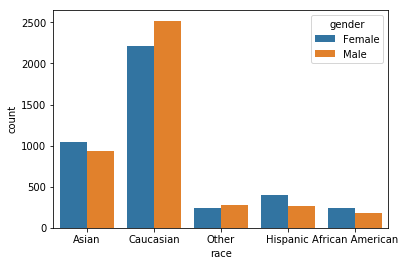

In [17]:
#data visualization
#profile of speed daters at registration
#race
race_replace = {1 : 'African American', 2: 'Caucasian',3: 'Hispanic',4:'Asian',5:'Native American', 6: 'Other'}
dating['race'].replace(race_replace, inplace =True)
sns.countplot(x = 'race', hue='gender', data = dating)
#majority of speed daters are caucasian for both genders

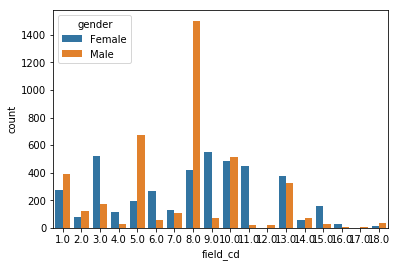

In [18]:
#Field of study
sns.countplot(x = 'field_cd', hue= 'gender',data = dating)
#majority of males in Business
#majority of females in Education

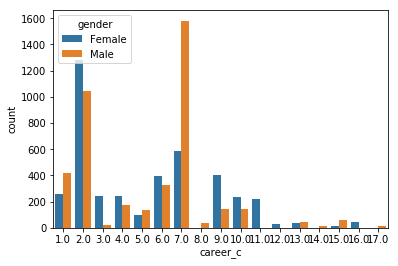

In [19]:
#intended career
sns.countplot(x = 'career_c', hue= 'gender',data = dating)
#majority of males: banking, consulting, finance, business
#majority of female: academia/research

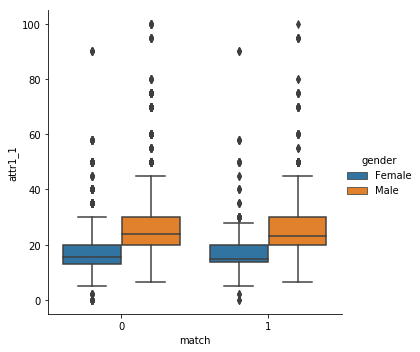

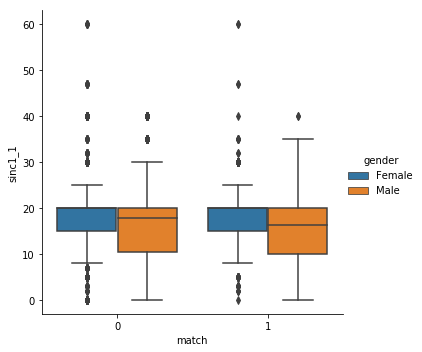

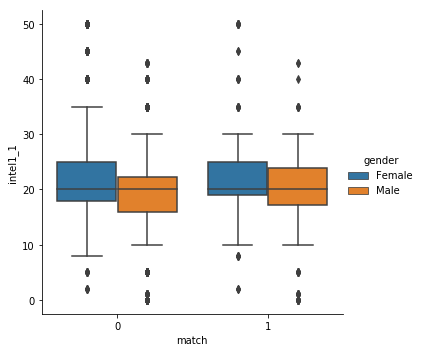

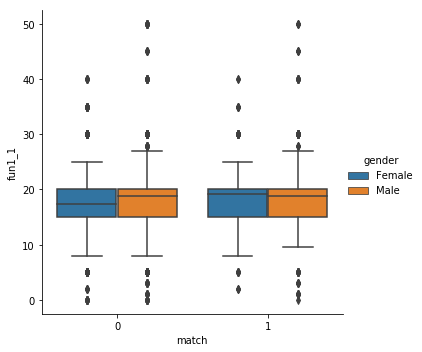

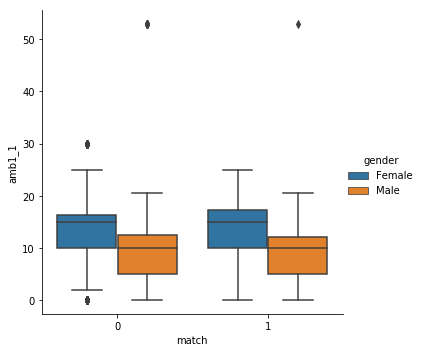

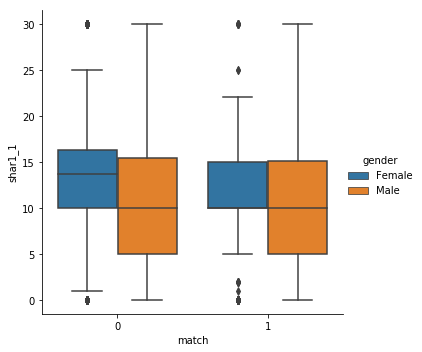

In [20]:
#Looking at different preferences/attributes (prior to the event -> pre-event survey)
#each person rates how much he/she values Attractiveness, Sincerity, Intelligence, Fun, Ambition, Shared interests towards opposite gender

sns.catplot(x= 'match', y= 'attr1_1', hue = 'gender', kind = 'box',data = dating)
sns.catplot(x= 'match', y= 'sinc1_1', hue = 'gender', kind = 'box',data = dating)
sns.catplot(x= 'match', y= 'intel1_1', hue = 'gender', kind = 'box',data = dating)
sns.catplot(x= 'match', y= 'fun1_1', hue = 'gender', kind = 'box',data = dating)
sns.catplot(x= 'match', y= 'amb1_1', hue = 'gender', kind = 'box',data = dating)
sns.catplot(x= 'match', y= 'shar1_1', hue = 'gender', kind = 'box',data = dating)
#Importance of Attractiveness: Male > Female
#mating hypothesis; possible reason: attractiveness/physical appearance is a signal for reproductive capacity/fertility, youthfulness
#Sincere
#Intelligent: Female > Male; females look for a provider of resources
#Fun
#Ambitious: Female > Male; females look for a provider of resources
#shared interests

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


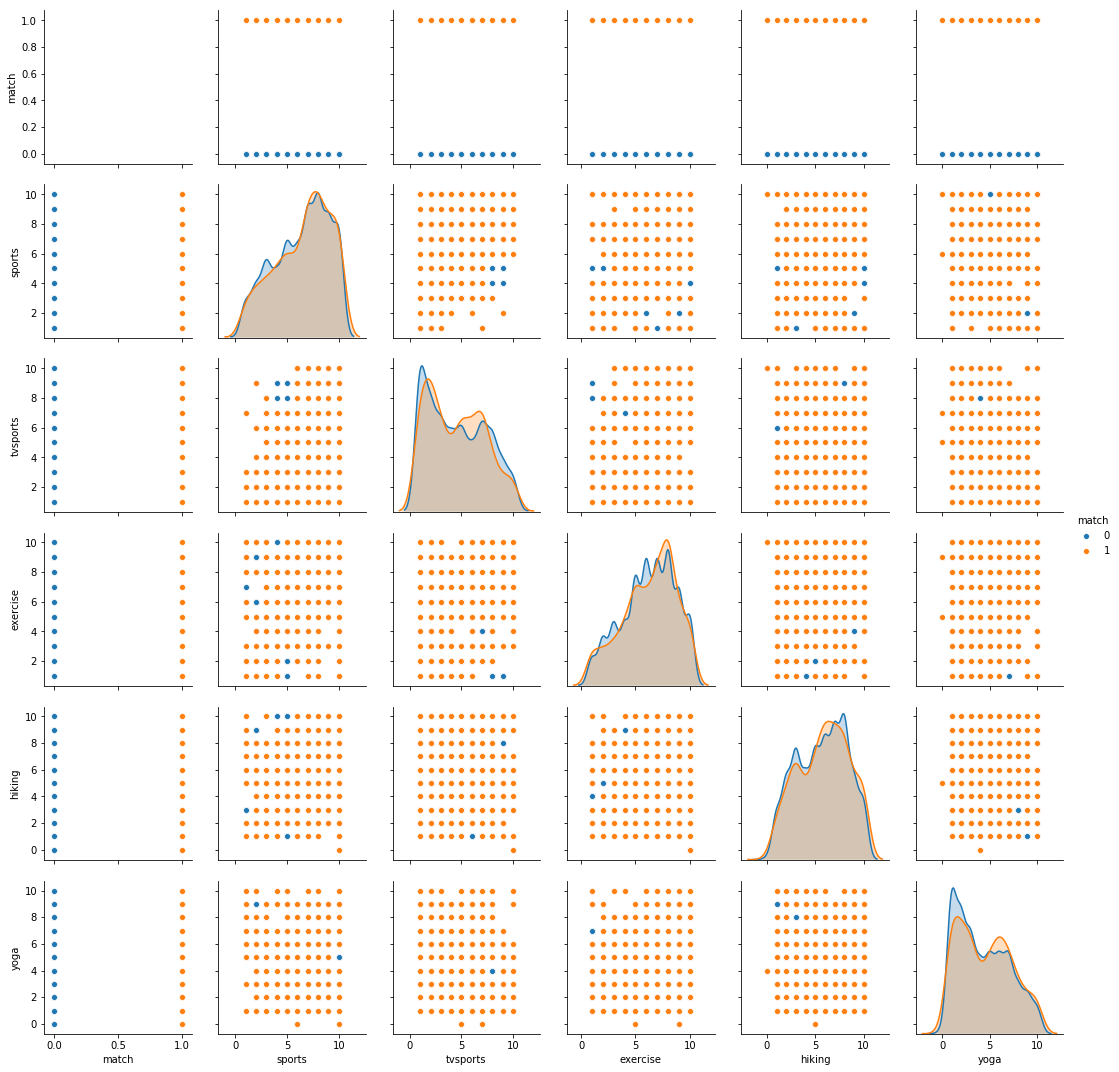

In [21]:
#Interests: comparing 13 interests between those who got a match and who did not
dating_interests1 = dating[['match','sports','tvsports','exercise','hiking','yoga']]
sns.pairplot(dating_interests1, hue = 'match')

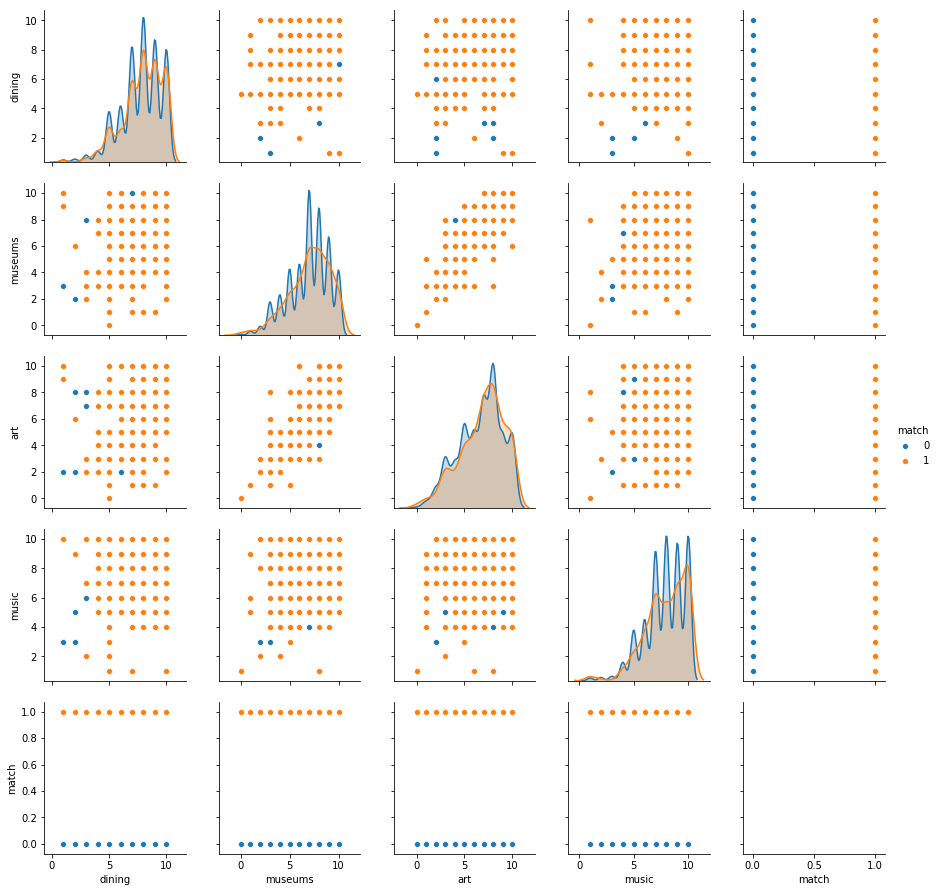

In [22]:
dating_interests2 = dating[['dining','museums','art','music','match']]
sns.pairplot(dating_interests2, hue = 'match')

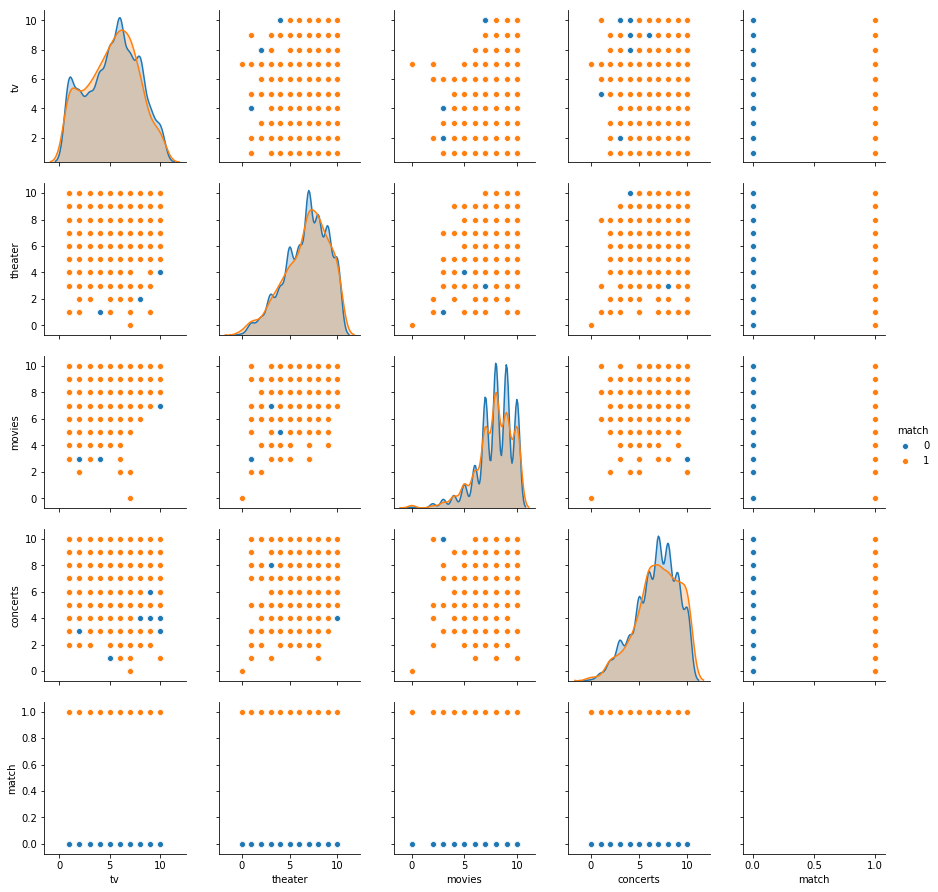

In [23]:
dating_interests3 = dating[['tv','theater','movies','concerts','match']]
sns.pairplot(dating_interests3, hue = 'match')

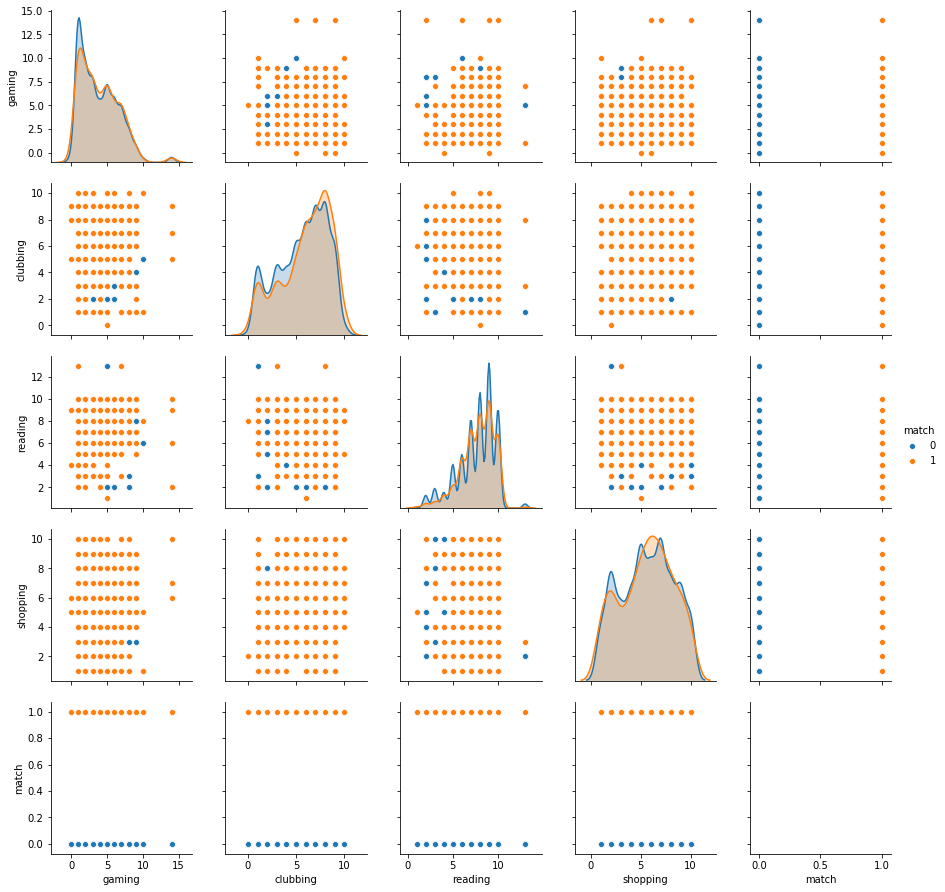

In [24]:
dating_interests4 = dating[['gaming','clubbing','reading','shopping','match']]
sns.pairplot(dating_interests4, hue = 'match')

In [27]:
#remove the 3 columns of strings: 'from', 'career','field' to find any correlation with 'match'
dating2 = dating.drop(['from','field','career'], axis=1)

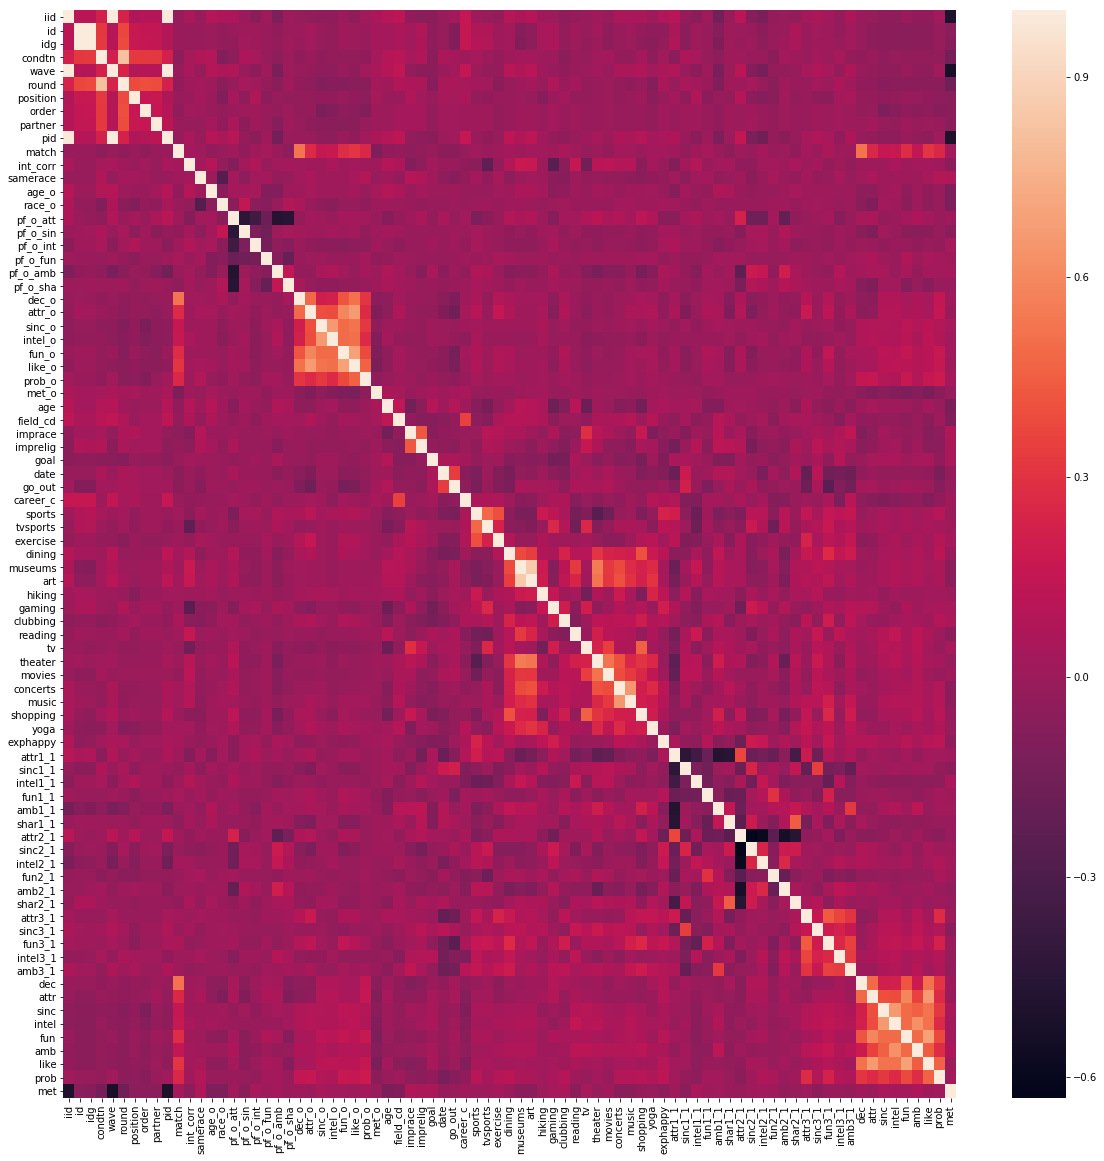

In [28]:
#Heatmap to see any correlation
#want to see if interests and attributes have any correlation with 'match'
plt.figure(figsize=(20,20))

sns.heatmap(dating2.corr())
#what I noticed is that none of the interests looked like they had strong correlations with 'match'

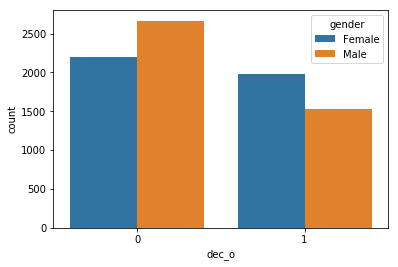

In [29]:
sns.countplot(x = 'dec_o', hue= 'gender',data = dating)
#want to see if the partner said yes to the subject for a second date; who gets more rejections?
#more females get a yes for a second date
#males get rejected more for a second date

In [30]:
#data modeling
#linear regression
#likelihood of the person to want a second date based on the ratings of the 6 attributes given to the partner
import statsmodels.formula.api as smf
model = smf.ols('dec ~ attr + sinc+ intel + fun + amb + like + prob + int_corr', data = dating) #what was on scorecard during event
result = model.fit()
#put more variables
#look at distributions - where are the outliers, 
#try feature selection algorithm: tree; complementary/different
#try model separate by gender

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dec   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     440.0
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        04:29:40   Log-Likelihood:                -3800.0
No. Observations:                7326   AIC:                             7618.
Df Residuals:                    7317   BIC:                             7680.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4229      0.025    -16.799      0.000      -0.472      -0.374
attr           0.0690      0.003     20.378      0.000       0.062       0.076
sinc          -0.0302      0.004     -7.869      0.000      -0.038      -0.023
intel         -0.0021      0.005     -0.450      0.653      -0.011       0.007
fun            0.0226      0.004      6.214      0.000       0.015       0.030
amb           -0.0194      0.004     -5.495      0.000      -0.026      -0.013
like           0.0833      0.004     19.249      0.000       0.075       0.092
prob           0.0256      0.003      9.914      0.000       0.021       0.031
int_corr      -0.0055      0.016     -0.350      0.727      -0.036       0.025
==============================================================================
Omnibus:                     1706.878   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.103
Skew:                           0.044   Prob(JB):                     4.59e-68
Kurtosis:                       1.996   Cond. No.                         93.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#likelihood of a match (both parties say yes to a second date) based on ratings of 6 attributes by both parties
model_match = smf.ols('match ~ dec + dec_o + attr_o + attr + sinc + sinc_o + intel + intel_o + fun_o + fun + like_o + like+ prob + prob_o + int_corr', data = dating)
result_match = model_match.fit()

In [33]:
result_match.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  match   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     688.0
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        04:29:40   Log-Likelihood:                -47.829
No. Observations:                7246   AIC:                             127.7
Df Residuals:                    7230   BIC:                             237.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2408      0.021    -11.695      0.000      -0.281      -0.200
dec            0.4196      0.007     59.060      0.000       0.406       0.434
dec_o          0.4196      0.007     59.060      0.000       0.406       0.434
attr_o         0.0081      0.002      3.807      0.000       0.004       0.012
attr           0.0081      0.002      3.799      0.000       0.004       0.012
sinc          -0.0013      0.002     -0.545      0.586      -0.006       0.003
sinc_o        -0.0013      0.002     -0.545      0.586      -0.006       0.003
intel         -0.0016      0.003     -0.635      0.525      -0.007       0.003
intel_o       -0.0016      0.003     -0.634      0.526      -0.007       0.003
fun_o          0.0074      0.002      3.385      0.001       0.003       0.012
fun            0.0074      0.002      3.397      0.001       0.003       0.012
like_o        -0.0080      0.003     -2.987      0.003      -0.013      -0.003
like          -0.0081      0.003     -2.988      0.003      -0.013      -0.003
prob          -0.0006      0.002     -0.403      0.687      -0.004       0.002
prob_o        -0.0006      0.002     -0.401      0.688      -0.004       0.002
int_corr       0.0205      0.009      2.171      0.030       0.002       0.039
==============================================================================
Omnibus:                    29827.728   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              983.218
Skew:                           0.202   Prob(JB):                    3.14e-214
Kurtosis:                       1.241   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#logistic regression
from sklearn import preprocessing
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [45]:
#fill in NaN values for 'like' with the mean
dating['like'].fillna((dating['like'].mean()), inplace=True)

In [46]:
#what if match cannot be predicted by attributes either? what if can be predicted just by the subject's decision to see the partner for a second date AND just generally because that person is likable?
X = dating[['dec', 'like']]  #want to look at the decision the subject made and the rating given in terms of how much partner is likable
y = dating['match']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


dating_log_model = LogisticRegression()
dating_log_model.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
predictions = dating_log_model.predict(X_test)
print(metrics.accuracy_score(y_test, predictions))

#pretty high prediction of the model
#without knowing the partner's decision, if the subject LIKED the partner and DECIDED to meet the partner for a second date,there is 83% chance that the partner thought the same and there is a match!
#83% chance of NO 'friend zone' hooray (requited love)

0.8305489260143198


In [53]:
#cross-validation
kf3 = model_selection.KFold(n_splits=4, shuffle=True)
for train, test in kf3.split(dating):
    print(train,test)

[   0    1    2 ... 8375 8376 8377] [  10   11   12 ... 8356 8357 8374]
[   0    1    2 ... 8375 8376 8377] [   4   13   16 ... 8366 8368 8369]
[   2    4    5 ... 8374 8375 8376] [   0    1    3 ... 8370 8373 8377]
[   0    1    3 ... 8373 8374 8377] [   2    5    7 ... 8372 8375 8376]


In [ ]:
#try random forest, decision trees, naive bayes